### OPCKDE Exploring Data

### Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [2]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [3]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Image saved as {file_path}')

#### Recovering the data

In [4]:
import pandas as pd

In [10]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "datasets"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [11]:
def load_opcdk_data(ldd_path = LDD_PATH):
  csv_path = os.path.join(ldd_path, 'OsteoporosisPredictionInCKD.csv')
  return pd.read_csv(csv_path)

#### Understanding the data structure

In [12]:
opcdk = load_opcdk_data()

In [13]:
opcdk.head()

,Cre,Gender,eGFR,Osteoporosis,Age,Weight,Height,BMI,Albumin,Calcium,...,CVA,Cataract,Fragility fracture hx,T1DM,Osteogenesis Imperfecta,Hyperthyroidism,Hypogonadism,Premature ovarian insufficiency,Malnutrition,Chronic liver disease
0,1.12,0,58.75,1,53.2,42.7,155.1,17.8,4.2,9.4,...,0,1,0,0,0,0,0,0,0,0
1,1.81,1,38.87,1,73.5,NaN,NaN,NaN,3.5,8.8,...,0,0,0,0,0,0,0,0,0,0
2,1.05,0,52.28,1,84.4,NaN,NaN,NaN,2.9,7.6,...,0,0,1,0,0,0,0,0,0,0
3,0.98,0,56.88,1,84.1,NaN,NaN,NaN,3.7,9.5,...,0,0,1,0,0,0,0,0,0,0
4,1.15,0,47.11,1,83.5,62.7,152.3,27.0,NaN,8.8,...,1,0,1,0,0,0,0,0,0,0


In [16]:
opcdk.columns

Index(['Cre', 'Gender', 'eGFR', 'Osteoporosis', 'Age', 'Weight', 'Height',
       'BMI', 'Albumin', 'Calcium', 'Phosphate', 'ALP', 'iPTH', 'HbA1c',
       'Glucose', 'WBC', 'HGB', 'Steroid usage', 'OA', 'RA', 'DM', 'HTN',
       'CVA', 'Cataract', 'Fragility fracture hx', 'T1DM',
       'Osteogenesis Imperfecta', 'Hyperthyroidism', 'Hypogonadism',
       'Premature ovarian insufficiency', 'Malnutrition',
       'Chronic liver disease'],
      dtype='object')

In [17]:
opcdk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cre                              6614 non-null   float64
 1   Gender                           6614 non-null   int64  
 2   eGFR                             6614 non-null   float64
 3   Osteoporosis                     6614 non-null   int64  
 4   Age                              6614 non-null   float64
 5   Weight                           4566 non-null   float64
 6   Height                           4326 non-null   float64
 7   BMI                              4311 non-null   float64
 8   Albumin                          5945 non-null   float64
 9   Calcium                          6142 non-null   float64
 10  Phosphate                        4522 non-null   float64
 11  ALP                              5542 non-null   float64
 12  iPTH                

In [ ]:
# Visualizing the distribution of the target variable
opcdk['Osteoporosis'].value_counts()

Osteoporosis
1    4526
0    2088
Name: count, dtype: int64

In [19]:
opcdk.describe()

,Cre,Gender,eGFR,Osteoporosis,Age,Weight,Height,BMI,Albumin,Calcium,...,CVA,Cataract,Fragility fracture hx,T1DM,Osteogenesis Imperfecta,Hyperthyroidism,Hypogonadism,Premature ovarian insufficiency,Malnutrition,Chronic liver disease
count,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000,4566.000000,4326.000000,4311.000000,5945.000000,6142.000000,...,6614.000000,6614.000000,6614.000000,6614.000000,6614.0,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000
mean,2.316964,0.299667,41.268966,0.684306,73.260553,59.187735,155.747619,24.355486,3.822439,8.947639,...,0.266556,0.375416,0.510886,0.012398,0.0,0.082855,0.011037,0.001058,0.013607,0.321439
std,2.738952,0.458147,17.095048,0.464827,12.729108,12.150316,9.156773,4.331088,0.571244,0.847437,...,0.442192,0.484267,0.499919,0.110662,0.0,0.275683,0.104485,0.032518,0.115864,0.467064
min,0.890000,0.000000,2.090000,0.000000,21.800000,31.300000,100.400000,12.500000,1.100000,4.300000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.120000,0.000000,32.212500,0.000000,66.300000,50.800000,149.800000,21.400000,3.500000,8.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.330000,0.000000,47.335000,1.000000,75.300000,58.400000,155.100000,24.100000,3.900000,9.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.800000,1.000000,54.977500,1.000000,82.500000,66.000000,161.400000,26.900000,4.200000,9.400000,...,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,20.480000,1.000000,59.990000,1.000000,105.100000,165.000000,200.000000,57.600000,5.100000,15.500000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# histogram for numeric attributes
%matplotlib inline
import matplotlib.pyplot as plt

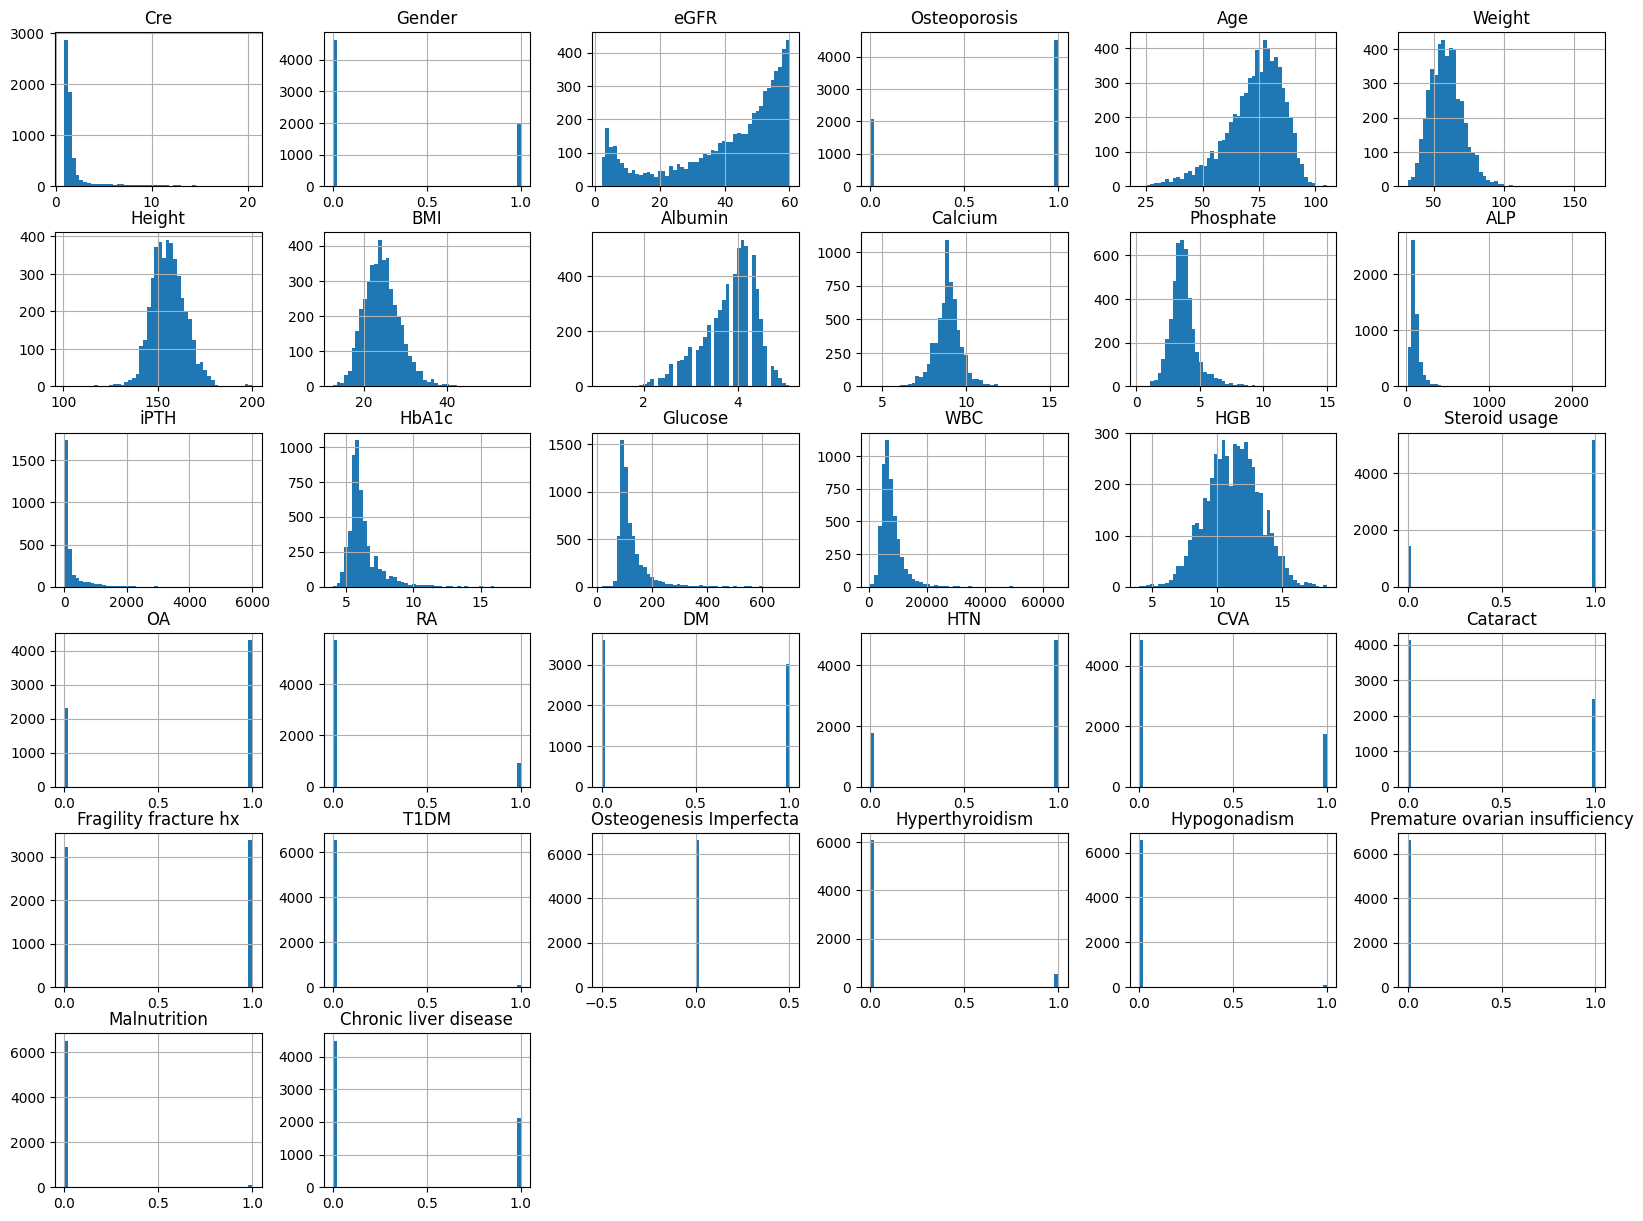

In [24]:
opcdk.hist(bins=50, figsize=(20, 15))
plt.show()